<a href="https://colab.research.google.com/github/trevoradriaanse/ANLY590/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

5


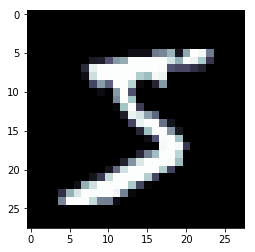

In [7]:
plt.imshow(x_train[0], cmap='bone')
print(y_train[0])

In [8]:
y_train, y_test = y_train[:, np.newaxis], y_test[:, np.newaxis]
print(y_train.shape, y_test.shape)

(60000, 1) (10000, 1)


In [0]:
tfkl = tf.keras.layers

In [25]:
# Using the functional-API style of Keras

# Input dim is 28 x 28 -> (784,), with unspecified batch size.
x = tfkl.Input(shape=x_train.shape[1:], batch_size=None)
x_flat = tfkl.Flatten()(x)
h1 = tfkl.Dense(128, activation=tf.nn.relu)(x_flat)
h2 = tfkl.Dense(64, activation=tf.nn.relu)(h1)
yhat = tfkl.Dense(10, activation=tf.nn.softmax)(h2)

model = tf.keras.Model(inputs=x, outputs=yhat)

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [26]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

results = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    batch_size=32, epochs=5)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 77us/sample - loss: 5.8598 - acc: 0.7661 - val_loss: 1.5974 - val_acc: 0.8673
Epoch 2/5
60000/60000 [==============================] - 4s 74us/sample - loss: 1.1663 - acc: 0.8913 - val_loss: 0.9419 - val_acc: 0.9020
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.6636 - acc: 0.9195 - val_loss: 0.7036 - val_acc: 0.9161
Epoch 4/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.4295 - acc: 0.9369 - val_loss: 0.5363 - val_acc: 0.9286
Epoch 5/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2968 - acc: 0.9491 - val_loss: 0.4822 - val_acc: 0.9306


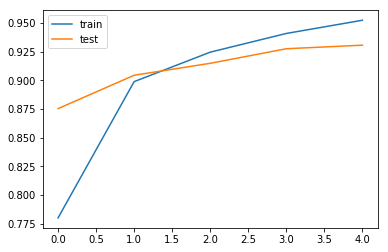

In [22]:
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.legend(['train', 'test'])